In [42]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import norm, gaussian_kde
from sklearn.mixture import GaussianMixture
import KDEpy

In [38]:
data = pd.read_csv('data_KDE_GM.csv')
data

,X,Y
0,-7.432474,0.738675
1,1.355525,-11.588993
2,-6.622975,-1.167688
3,-5.101732,-2.565564
4,-6.362525,-6.814269
...,...,...
3995,-7.775717,-0.526459
3996,-6.079989,-6.416442
3997,-5.718541,-0.254200
3998,-5.172632,-2.381801


In [39]:
x = data['X'].to_numpy()
y = data['Y'].to_numpy()

## a) Use scipy.stats.gaussian kde to perform a KDE on the data.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gaussian_kde.html

In [64]:
xmin = x.min()

xmax = x.max()

ymin = y.min()

ymax = y.max()

print(xmin, xmax, ymin, ymax)

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([X.ravel(), Y.ravel()])

values = np.vstack([x, y])

kernel = gaussian_kde(values)

Z = np.reshape(kernel(positions).T, X.shape)

-12.712683310678226 5.176704039152524 -15.182971660197657 2.141739994732008


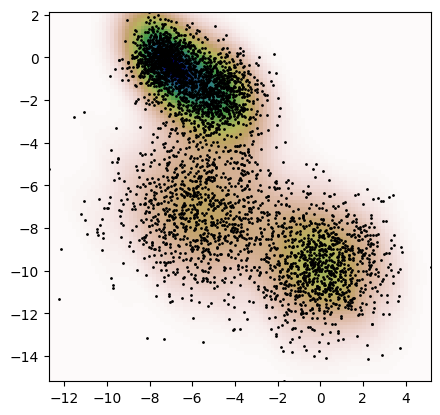

In [61]:
fig, ax = plt.subplots()

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,

          extent=[xmin, xmax, ymin, ymax])

ax.plot(x, y, 'k.', markersize=2)

ax.set_xlim([xmin, xmax])

ax.set_ylim([ymin, ymax])

plt.show()

## b) Use sklearn.mixture.GaussianMixture to fit a gaussian mixture model for the provided data. Vary the number of components starting with 1 up to 5.


In [55]:
gm = GaussianMixture(n_components=1, random_state=0).fit(values)
gm.means_

array([[-3.34689975, -5.11673413, -3.8953318 , ..., -2.98637053,
        -3.77721628, -3.13954552]])

## c)  Visualize and discuss your results

-12.712683310678226 5.176704039152524 -15.182971660197657 2.141739994732008


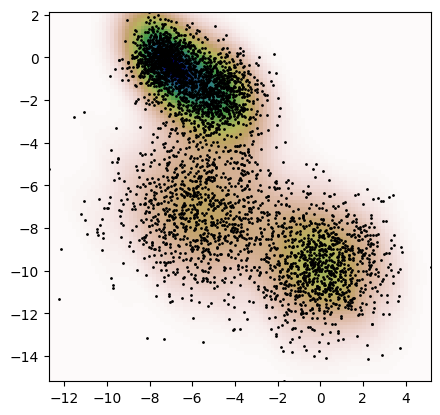

In [66]:
xmin = x.min()

xmax = x.max()

ymin = y.min()

ymax = y.max()

print(xmin, xmax, ymin, ymax)

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([X.ravel(), Y.ravel()])

values = np.vstack([x, y])

kernel = gaussian_kde(values)

Z = np.reshape(kernel(positions).T, X.shape)

fig, ax = plt.subplots()

ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,

          extent=[xmin, xmax, ymin, ymax])

ax.plot(x, y, 'k.', markersize=2)

ax.set_xlim([xmin, xmax])

ax.set_ylim([ymin, ymax])

plt.show()